In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as se

In [ ]:
bitcoin = pd.read_csv('BitCoin.csv')
BTCB = pd.read_csv('BTCB.csv')
WBTC = pd.read_csv('WBTC.csv')
Etherium = pd.read_csv('Etherium.csv')
renBTC = pd.read_csv('renBTC.csv')

In [ ]:
bitcoin.head()

,Unnamed: 0,timeOpen,timeClose,timeHigh,timeLow,quote.open,quote.high,quote.low,quote.close,quote.volume,quote.marketCap,quote.timestamp
0,0,2021-02-14T00:00:00.000Z,2021-02-14T23:59:59.999Z,2021-02-14T12:17:42.000Z,2021-02-14T00:00:37.000Z,47114.509586,49487.640873,47114.509586,48717.290211,7.124868e+10,9.075513e+11,2021-02-14T23:59:59.999Z
1,1,2021-02-15T00:00:00.000Z,2021-02-15T23:59:59.999Z,2021-02-15T00:49:42.000Z,2021-02-15T02:34:42.000Z,48696.536660,48875.571611,46347.477092,47945.056832,7.706990e+10,8.932101e+11,2021-02-15T23:59:59.999Z
2,2,2021-02-16T00:00:00.000Z,2021-02-16T23:59:59.999Z,2021-02-16T12:36:38.000Z,2021-02-16T00:37:42.000Z,47944.458007,50341.103252,47201.303755,49199.871344,7.704958e+10,9.166234e+11,2021-02-16T23:59:59.999Z
3,3,2021-02-17T00:00:00.000Z,2021-02-17T23:59:59.999Z,2021-02-17T21:37:36.000Z,2021-02-17T01:01:41.000Z,49207.276432,52533.914312,49072.377140,52149.007536,8.082055e+10,9.716116e+11,2021-02-17T23:59:59.999Z
4,4,2021-02-18T00:00:00.000Z,2021-02-18T23:59:59.999Z,2021-02-18T00:25:38.000Z,2021-02-18T12:16:37.000Z,52140.972717,52474.107249,51015.764554,51679.796694,5.205472e+10,9.629151e+11,2021-02-18T23:59:59.999Z


In [ ]:
bitcoin['quote.close'].describe()

count      365.000000
mean     47979.340336
std       9207.851773
min      29807.347673
25%      40782.738262
50%      47711.486463
75%      56216.185002
max      67566.830088
Name: quote.close, dtype: float64

In [22]:
BTCB['quote.close'].describe()

count      365.000000
mean     47952.164706
std       9201.254080
min      29620.861545
25%      40730.194046
50%      47824.978844
75%      56193.829070
max      67502.421323
Name: quote.close, dtype: float64

In [23]:
Etherium['quote.close'].describe()

count     365.000000
mean     2981.329021
std       880.276731
min      1416.048906
25%      2211.625808
50%      2983.586995
75%      3745.440400
max      4812.087614
Name: quote.close, dtype: float64

In [24]:
WBTC['quote.close'].describe()

count      365.000000
mean     47935.909715
std       9177.209090
min      29707.063267
25%      40832.670248
50%      47822.360416
75%      56022.034650
max      67549.228008
Name: quote.close, dtype: float64

In [25]:
renBTC['quote.close'].describe()

count      365.000000
mean     47893.644951
std       9158.792245
min      29654.551807
25%      40658.588955
50%      47855.839816
75%      55871.420644
max      67494.942834
Name: quote.close, dtype: float64

In [19]:
# Create % change of the closing price
bitcoin['return']=bitcoin['quote.close'].pct_change()
BTCB['return']=BTCB['quote.close'].pct_change()
renBTC['return']=renBTC['quote.close'].pct_change()
WBTC['return']=WBTC['quote.close'].pct_change()
Etherium['return']=Etherium['quote.close'].pct_change()

In [30]:
# For Comparative studies we merge the 5 files such that the Closing price of each Coin is indexed by the date
return_df= pd.DataFrame()

File = ['BitCoin','BTCB','Etherium','WBTC','renBTC']
for file in File:
    return_df[file] = pd.read_csv(file+'.csv', index_col = 'timeClose')['quote.close'].pct_change()
    
return_df.dropna(inplace=True)

return_df.head()

,BitCoin,BTCB,Etherium,WBTC,renBTC
timeClose,,,,,
2021-02-15T23:59:59.999Z,-0.015851,-0.009634,-0.014012,-0.015150,-0.014748
2021-02-16T23:59:59.999Z,0.026172,0.018769,0.000717,0.023998,0.020084
2021-02-17T23:59:59.999Z,0.059942,0.066033,0.037837,0.062781,0.065790
2021-02-18T23:59:59.999Z,-0.008998,-0.014325,0.048143,-0.009752,-0.009036
2021-02-19T23:59:59.999Z,0.081431,0.078384,0.011724,0.078853,0.078106


Text(0, 0.5, 'Percent Change')

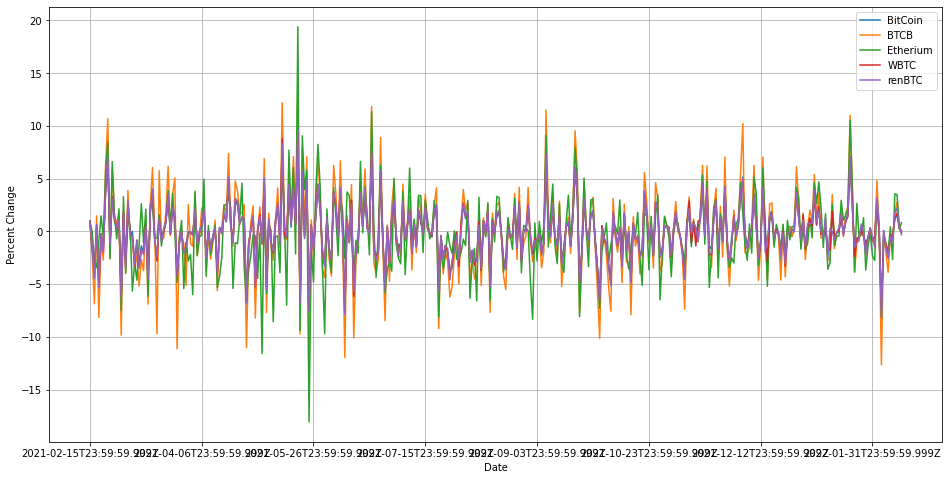

In [32]:
return_norm = return_df.divide(return_df.iloc[0])
return_norm.plot(figsize = (16,8), grid = True)
plt.xlabel('Date')
plt.ylabel('Percent Change in closing price')

In [ ]:
# For Comparative studies we merge the 5 files such that the Closing price of each Coin is indexed by the date
crypto= pd.DataFrame()

File = ['BitCoin','BTCB','Etherium','WBTC','renBTC']
for file in File:
    crypto[file] = pd.read_csv(file+'.csv', index_col = 'timeClose')['quote.close']
    
crypto.dropna(inplace=True)

crypto.head()

,BitCoin,BTCB,Etherium,WBTC,renBTC
timeClose,,,,,
2021-02-14T23:59:59.999Z,48717.290211,48530.117038,1805.084047,48696.931816,48677.583831
2021-02-15T23:59:59.999Z,47945.056832,48062.597697,1779.790978,47959.185295,47959.704219
2021-02-16T23:59:59.999Z,49199.871344,48964.705728,1781.067477,49110.090827,48922.925681
2021-02-17T23:59:59.999Z,52149.007536,52198.011221,1848.458273,52193.264292,52141.557594
2021-02-18T23:59:59.999Z,51679.796694,51450.299717,1937.449256,51684.300423,51670.429368


In [ ]:
#To compare the relative performance of the coins, we divide the whole dataframe by the first row
crypto_norm = crypto.divide(crypto.iloc[0])


Text(0, 0.5, 'Percent Change')

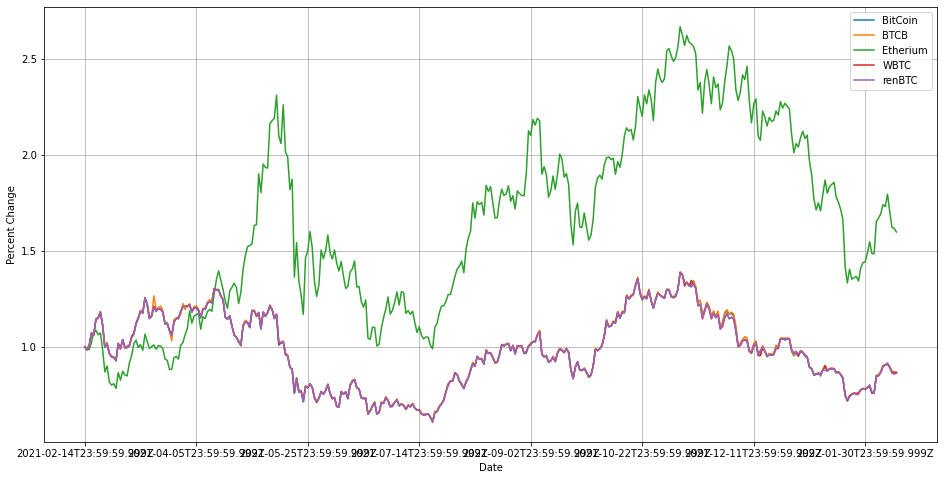

In [ ]:
crypto_norm.plot(figsize = (16,8), grid = True)
plt.xlabel('Date')
plt.ylabel('Percent Change')

In [ ]:
crypto_pct = crypto.pct_change().dropna()
crypto_pct.describe()

,BitCoin,BTCB,Etherium,WBTC,renBTC
count,364.000000,364.000000,364.000000,364.000000,364.000000
mean,0.000356,0.000386,0.002639,0.000353,0.000326
std,0.038708,0.039253,0.051789,0.038567,0.038258
min,-0.137661,-0.131920,-0.272003,-0.141519,-0.142922
25%,-0.020956,-0.022313,-0.024084,-0.021060,-0.020476
50%,0.000251,0.002015,0.004625,0.001449,0.000884
75%,0.021503,0.022139,0.032230,0.022190,0.021575
max,0.116978,0.121927,0.253136,0.115531,0.120875


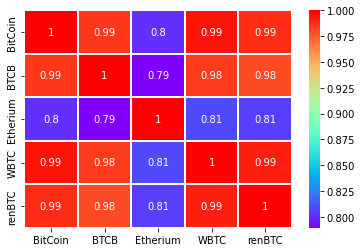

In [ ]:
corr = crypto_pct.corr()
se.heatmap(corr, cmap = 'rainbow', annot=True, linewidth = 1)

#Below is a heatmap of the correlation matrix of the cryptocurrencies